In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
data_file = pd.read_csv("../Amazon Fine Food ML Project/Data/Reviews.csv") # change the file path as needed
print("no. of rows, no.cols: ",data_file.shape)
data_file.head()

no. of rows, no.cols:  (568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
data_file.drop(["Id"], axis=1, inplace=True)
data_file.tail()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [7]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568428 non-null  object
 3   HelpfulnessNumerator    568454 non-null  int64 
 4   HelpfulnessDenominator  568454 non-null  int64 
 5   Score                   568454 non-null  int64 
 6   Time                    568454 non-null  int64 
 7   Summary                 568427 non-null  object
 8   Text                    568454 non-null  object
dtypes: int64(4), object(5)
memory usage: 39.0+ MB


In [9]:
# data_file.describe(include="all")
data_file.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,1.743817,2.22881,4.183199,1.296257e+09
std,7.636513,8.28974,1.310436,4.804331e+07
min,0.000000,0.00000,1.000000,9.393408e+08
25%,0.000000,0.00000,4.000000,1.271290e+09
50%,0.000000,1.00000,5.000000,1.311120e+09
75%,2.000000,2.00000,5.000000,1.332720e+09
max,866.000000,923.00000,5.000000,1.351210e+09


In [11]:
print("No of duplicate rows in the dataset: ",data_file.duplicated().sum())
print("Null values in the dataset:")
print(data_file.isna().sum())

No of duplicate rows in the dataset:  281
Null values in the dataset:
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [12]:
non_null_df = data_file.dropna()
print("Cleaned data after dropping the null values from the dataset: ")
non_null_df.isna().sum()

Cleaned data after dropping the null values from the dataset: 


ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [15]:
#Sorting data according to ProductId in ascending order
sorted_df = non_null_df.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [17]:
duplicate_df = non_null_df.duplicated(subset=["UserId", "ProfileName", "Time", "Text"])
print(f"Number of duplicates in the subset: {duplicate_df.sum()}")


Number of duplicates in the subset: 174487


In [19]:
filtered_df = sorted_df.drop_duplicates(subset=["UserId", "ProfileName", "Time", "Text"], keep='first', inplace=False)
print(f"Shape of the final data after removing duplicates: {filtered_df.shape}")


Shape of the final data after removing duplicates: (393914, 9)


In [21]:
cleaned_df = filtered_df.copy()
cleaned_df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150524,0006641040,A2QID6VCFTY51R,Rick,1,2,5,1025481600,"In December it will be, my snowman's anniversa...","My daughter loves all the ""Really Rosie"" books..."
150510,0006641040,A1C9K534BCI9GO,Laura Purdie Salas,0,0,4,1344211200,Charming and childlike,"A charming, rhyming book that describes the ci..."
150511,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,5,1338249600,Must have.,I set aside at least an hour each day to read ...
150512,0006641040,ASH0DZQQF6AIZ,tessarat,0,0,5,1325721600,A classic,I remembered this book from my childhood and g...
150513,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,5,1313884800,Chicken soup with Rice,It's a great book with adorable illustrations....


In [23]:
non_duplicate_df = cleaned_df.duplicated(subset=["UserId", "ProfileName", "Time", "Text"])
print(f"Number of duplicates in the subset: {duplicate_df.sum()}")


Number of duplicates in the subset: 174487


In [24]:
cleaned_df["Text"].values[88]

'My dogs love this product and this was the cheapest I could find it any where. Shipped and received as notified when purchased.'

# Exploratory Data Analysis

In [28]:
cleaned_df["Score"].value_counts()

Score
5    250956
4     56086
1     36304
3     29770
2     20798
Name: count, dtype: int64

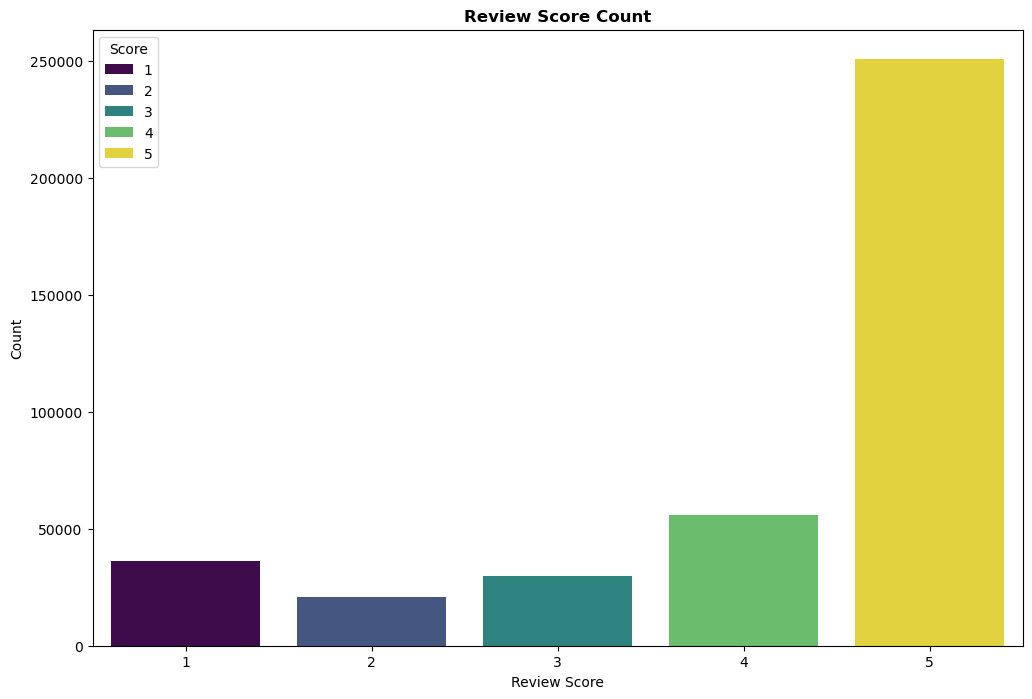

In [30]:
# Calculate the value counts of the 'Score' column
score_counts = cleaned_df["Score"].value_counts().sort_index()

# Create a new DataFrame for plotting
score_counts_df = pd.DataFrame({'Score': score_counts.index, 'Count': score_counts.values})
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Count', hue='Score', data=score_counts_df, palette="viridis")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.title("Review Score Count", fontweight='bold')
plt.show()


### Interpretation:
The plot shows the distribution of review scores ranging from 1 to 5, with 5 being the highest and 1 the lowest.The y-axis represents the count of reviews, while the x-axis represents the review scores. Each bar is color-coded according to the score.

### Observations:
1. **High Positive Reviews**:
    **Score 5** has the highest count, with approximately 250,000 reviews. This suggests that most reviews are highly positive, indicating customer satisfaction with many of the products.
2. **Moderate Positive Reviews**:
    **Score 4** comes in second, with around 50,000 reviews. This also indicates a positive sentiment but with some room for improvement.
3. **Neutral Reviews**:
    **Score 3** has approximately 29,000 reviews. These reviews are neutral, showing that customers had an average experience with the products.
4. **Moderate Negative Reviews**:
    **Score 2** has about 20,000 reviews. This suggests that these reviews express some dissatisfaction with the products.
6. **Low Negative Reviews**:
    **Score 1** has the lowest count, with approximately 5,000 reviews. This indicates that very few customers had a highly negative experience with the products.

### Insights:
The data suggests that most customers are satisfied with the products, as seen from the high counts for positive reviews (scores 4 and 5). There is a smaller proportion of negative reviews (scores 1 and 2), indicating that improvements could be targeted to address specific issues. The neutral reviews (score 3) provide an opportunity for businesses to identify areas for enhancement to convert these into higher satisfaction scores.



In [33]:
# we will see the products brought by each customer
purchases_data = cleaned_df[['ProductId','UserId']].groupby('UserId').agg({'ProductId': ['count']})
purchases_data.columns = ['No_of_products_purchased']
purchases_data = purchases_data.reset_index()

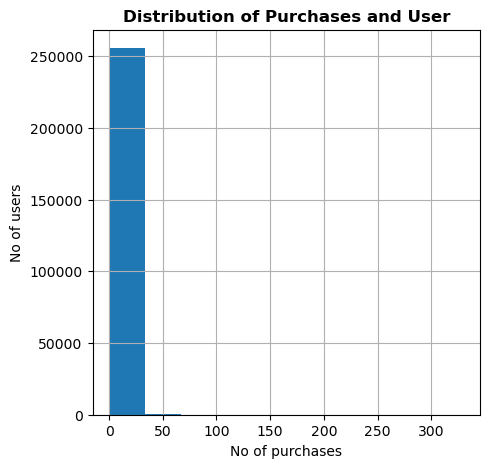

In [34]:
plt.figure(figsize=(5,5))
purchases_data["No_of_products_purchased"].hist()
plt.title("Distribution of Purchases and User", fontweight="bold")
plt.xlabel("No of purchases")
plt.ylabel("No of users")
plt.show()

### Interpretation:
The histogram plot shows the distribution of the number of products purchased by each customer.

### Observations:
1. **Purchase Distribution**:
The majority of users have made 1 purchase. There is a significant drop-off in the number of users as the number of purchases increases.

2. **Summary Statistics**:
   - **Count**: There are a total of 256,042 users.
   - **Mean**: On average, each user has purchased approximately 1.54 products.
   - **Standard Deviation (Std)**: The standard deviation is about 2.76, indicating some variability in the number of purchases.
   - **Minimum**: The minimum number of purchases by any user is 1.
   - **25th Percentile (25%)**: 25% of users have made at least 1 purchase.
   - **50th Percentile (Median/50%)**: 50% of users have made at least 1 purchase.
   - **75th Percentile (75%)**: 75% of users have made at least 1 purchase.
   - **Maximum**: The maximum number of purchases by any user is 329.

### Insights:
The histogram shows that most users have a relatively low number of purchases. The summary statistics provide a detailed understanding of the distribution, showing that while the average user makes around 1 purchase, some users make more.

In [38]:
print(purchases_data['No_of_products_purchased'].describe())

count    256042.000000
mean          1.538474
std           2.756671
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         329.000000
Name: No_of_products_purchased, dtype: float64


In [40]:
cleaned_df["usefulness"] = cleaned_df["HelpfulnessNumerator"] / cleaned_df["HelpfulnessDenominator"]

In [42]:
# Define the usefulness categories
usefulness = []

for i in cleaned_df["usefulness"]:
    if i > 0.75:
        usefulness.append(">75%")
    elif i < 0.25:
        usefulness.append("<25%")
    else:
        usefulness.append("25% - 75%")

# Assign the categorized list back to the dataframe
cleaned_df["usefulness"] = usefulness


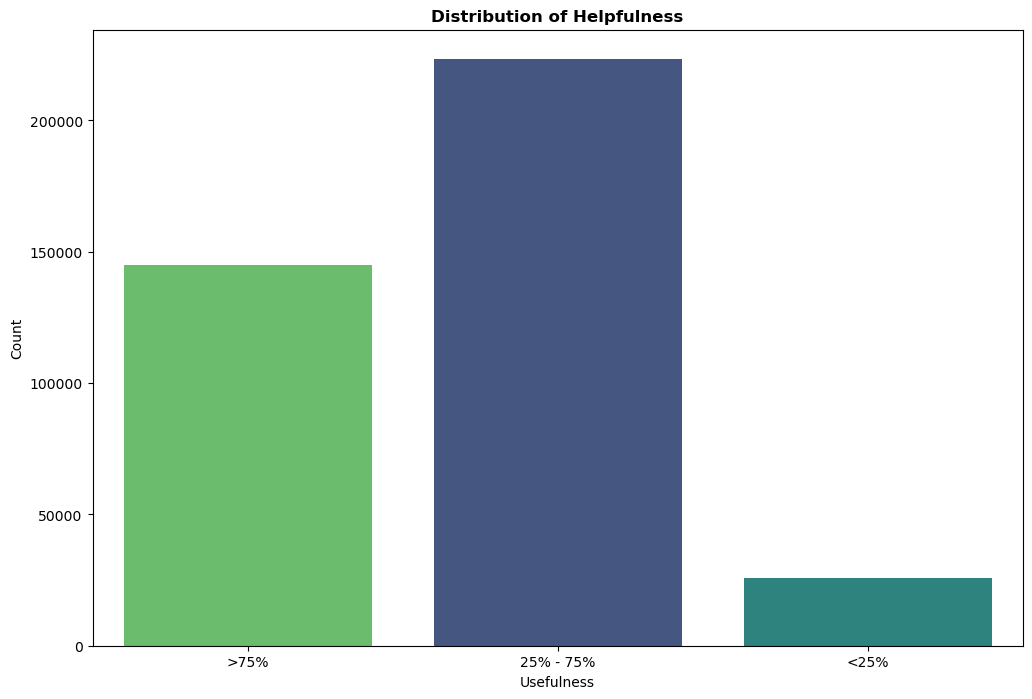

In [44]:
plt.figure(figsize=(12, 8))
sns.countplot(x='usefulness', hue='usefulness', data=cleaned_df, order=[">75%", "25% - 75%", "<25%"], palette="viridis")
plt.title("Distribution of Helpfulness", fontweight="bold")
plt.xlabel('Usefulness')
plt.ylabel('Count')
plt.show()

### Interpretation:
The bar chart displays the count of helpfulness ratings divided into three categories: **">75%"**, **"25% - 75%"**, and **"<25%"**. The categories are based on the percentage of helpfulness calculated from the `HelpfulnessNumerator` and `HelpfulnessDenominator`.

### Observations:
1. **High Helpfulness Ratings**:
The `">75%"` category has a notable count, indicating a significant number of reviews were found highly helpful by users. This suggests that many reviews are providing valuable information to potential buyers.

2. **Moderate Helpfulness Ratings**:
The `"25% - 75%"` category has the highest count among the three, showing that a large number of reviews fall into this range of perceived helpfulness. This indicates that while these reviews are somewhat helpful, there is room for improvement in their content or clarity.

3. **Low Helpfulness Ratings**:
The `"<25%"` category has the lowest count, suggesting that fewer reviews are found to be of little help by users. This implies that most reviews are at least somewhat useful to readers.

### Insights:
The high count in the `"25% - 75%"` category highlights the importance of continually improving review quality to enhance user experience. The presence of many highly helpful reviews (`">75%"` category) indicates that valuable feedback is being provided, which can influence purchasing decisions positively. The relatively lower count in the `"<25%"` category suggests that the majority of reviews are making a positive contribution to the information available to potential buyers.

In [47]:
cleaned_df["usefulness"].value_counts()

usefulness
25% - 75%    223356
>75%         144906
<25%          25652
Name: count, dtype: int64

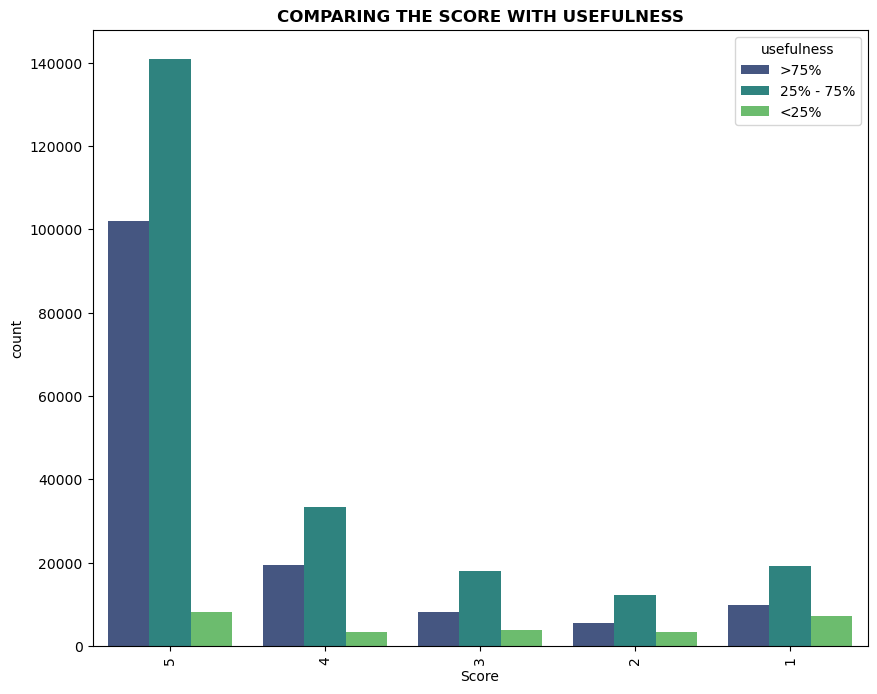

In [49]:
plt.figure(figsize=(10,8))
sns.countplot(x="Score",data=cleaned_df,hue="usefulness",hue_order=[">75%","25% - 75%","<25%"], order=[5,4,3,2,1], palette="viridis")
plt.xticks(rotation=90,fontsize=10)
plt.title("COMPARING THE SCORE WITH USEFULNESS", fontweight="bold")
plt.show()

### Interpretation:
The bar plot visualizes the count of different "Score" values from the Amazon Fine Food Reviews dataset, categorized by the "usefulness" levels: **">75%"**, **"25% - 75%"**, and **"<25%"**.

### Observations:
1. **High Helpfulness Ratings**:
The `">75%"` category shows the highest count across most scores, indicating that a significant number of reviews were found highly helpful by users. This suggests that many reviews provide valuable information to potential buyers.

2. **Moderate Helpfulness Ratings**:
The `"25% - 75%"` category has the second-highest count, showing that a large number of reviews fall into this range of perceived helpfulness. This indicates that while these reviews are somewhat helpful, there is room for improvement in their content or clarity.

4. **Low Helpfulness Ratings**:
The `"<25%"` category shows the lowest count, suggesting that fewer reviews are considered to be of little help by users. This implies that most reviews are at least somewhat useful to readers.

### Insights:
The high count in the `"25% - 75%"` and `">75%"` categories highlights the importance of continually improving review quality to enhance user experience. The presence of many highly helpful reviews (`">75%"` category) indicates that valuable feedback is being provided, which can positively influence purchasing decisions. The relatively lower count in the `"<25%"` category suggests that the majority of reviews are making a positive contribution to the information available to potential buyers.

In [52]:
# Calculate word count for each review
cleaned_df["word_count"] = cleaned_df["Text"].apply(lambda x: len(x.split()))

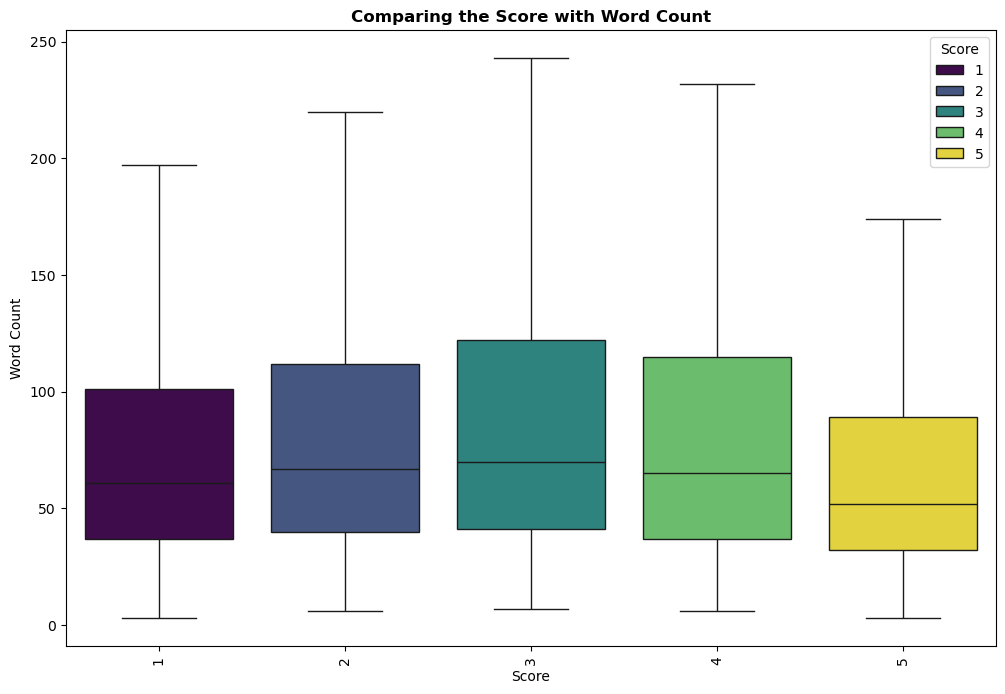

In [53]:
# Boxplot: Comparing the Score with Word Count
plt.figure(figsize=(12, 8))
sns.boxplot(x="Score", y="word_count", hue="Score", data=cleaned_df, showfliers=False, palette="viridis")
plt.xticks(rotation=90, fontsize=10)
plt.title("Comparing the Score with Word Count", fontweight="bold")
plt.xlabel("Score")
plt.ylabel("Word Count")
plt.show()



### Interpretation:
The box plot visualizes the distribution of word counts for different review scores (1 to 5).

### Observations:
1. **Word Count Distribution**:
Each box plot represents the range of word counts for reviews with scores from 1 to 5. The central line in each box indicates the median word count for the respective score. The boxes represent the interquartile range (IQR) where the middle 50% of word counts lie.

3. **Score-Wise Word Counts**:
   - **Score 1**: Reviews with a score of 1 tend to have lower word counts. The median word count is relatively low, and the overall distribution is more compact.
   - **Score 2**: Reviews with a score of 2 show a slightly wider distribution than score 1, with a higher median word count.
   - **Score 3**: Reviews with a score of 3 have a wider distribution and higher median word count compared to scores 1 and 2.
   - **Score 4**: Reviews with a score of 4 show a similar distribution to score 3 but with a slightly higher median word count.
   - **Score 5**: Reviews with a score of 5 have the widest distribution and the highest median word count, indicating that highly positive reviews tend to be more detailed.

### Insights:
The word count tends to increase with higher review scores. Reviews with scores of 4 and 5 are generally longer and more detailed. Reviews with lower scores (1 and 2) tend to be shorter, which might indicate that negative reviews are often brief and to the point. The variation in word count across different scores can provide insights into the nature of customer feedback—positive reviews might be more descriptive, while negative reviews could be more succinct.

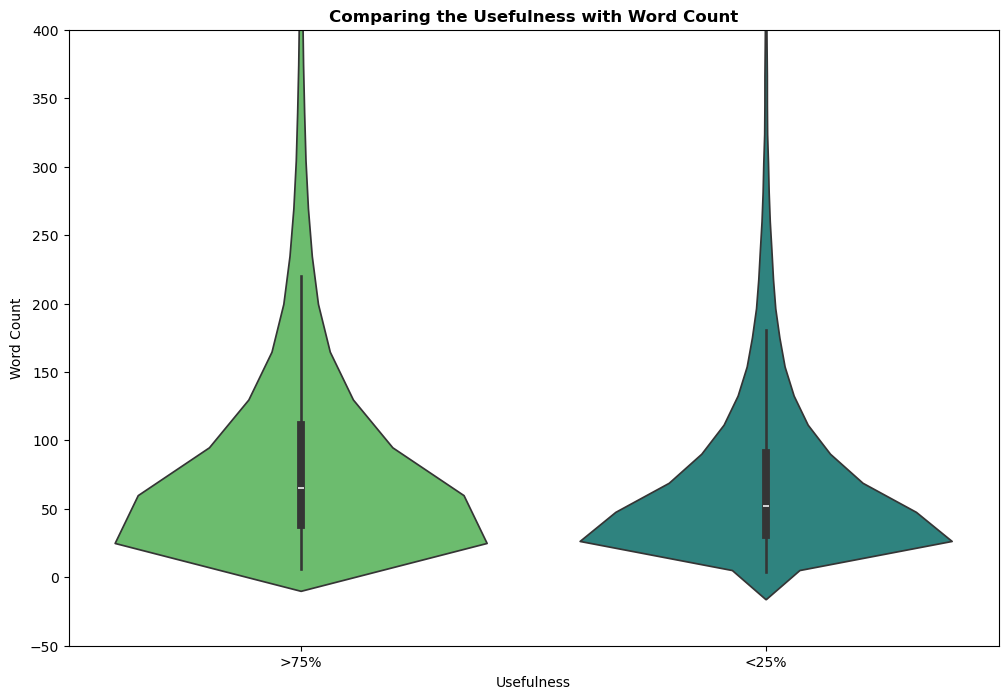

In [55]:
# Violinplot: Comparing the Usefulness with Word Count
plt.figure(figsize=(12, 8))
sns.violinplot(x="usefulness", y="word_count", hue="usefulness", data=cleaned_df,
               order=[">75%", "<25%"], palette="viridis")
plt.ylim(-50, 400)
plt.title("Comparing the Usefulness with Word Count", fontweight="bold")
plt.xlabel("Usefulness")
plt.ylabel("Word Count")
plt.show()

### Interpretation:
The violin plot visualizes the distribution of word counts for two categories of review usefulness: **">75%"** and **"<25%"**.

### Observations:
1. **Word Count Distribution**:
Each violin represents the range and distribution of word counts for the two usefulness categories. The green violin represents usefulness greater than 75%, while the blue violin represents usefulness less than 25%.

2. **High Usefulness Reviews (">75%")**:
The distribution is wider and more spread out, indicating a larger variation in word counts. The median word count is higher compared to the low usefulness category, suggesting that highly useful reviews tend to be more detailed and longer.

3. **Low Usefulness Reviews ("<25%")**:
The distribution is more compact, indicating less variation in word counts. The median word count is lower compared to the high usefulness category, suggesting that less useful reviews are generally shorter.

### Insights:
Reviews deemed more useful (usefulness > 75%) tend to have higher word counts, indicating that detailed and longer reviews are often considered more helpful by users. Reviews deemed less useful (usefulness < 25%) tend to have lower word counts, indicating that shorter reviews are often considered less helpful. Understanding the characteristics of useful reviews can help businesses and users improve the quality of their feedback and provide more valuable information to potential buyers.

# Analysis on Score (Target)

In [60]:
# removing the neutral score rows
cleaned_df = cleaned_df[cleaned_df["Score"] != 3] 

cleaned_df.shape

(364144, 11)

In [63]:
cleaned_df.loc[:, "Score"] = cleaned_df["Score"].apply(lambda x: 1 if x >= 4 else 0)

In [65]:
cleaned_df.sample(8)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,usefulness,word_count
157157,B0035DUVCQ,AWNQ2Y9BYC13H,Edward,1,1,1,1320969600,Round and Round it goes,"Works great, looks good next to the machine. ...",>75%,29
517355,B004984G40,A1Y67FIADSK44P,Marian Carcache,1,1,1,1326499200,Hello Beautiful,"Delicious, especially the chocolate. The vanil...",>75%,26
514608,B000CROPGG,A89NM7E2JGRFF,"PSaint ""PSaint""",6,6,1,1203724800,Bear Naked Vanilla Almond Crunch,I never dreamed I would purchase cereal on lin...,>75%,137
381553,B0000DGG8D,AJTFPL7NSDMF3,Karen A. Knapp,2,3,0,1275436800,Brussel's Crepe Myrtle Bonsai,"<a href=""http://www.amazon.com/gp/product/B000...",25% - 75%,105
166595,B002AMXQNY,A3OIFUH1BW15HP,LG,0,0,1,1328572800,Best coffee I've ever tasted,Makes Starbucks & Dunkin Donuts seem like junk...,25% - 75%,84
181948,B0009F3POY,A1BG34P716MOQT,Beth A. Heldmann,6,7,1,1206403200,working mother's must-have,This tea really works! I went back to work wh...,>75%,57
474418,B003SBZC1U,A2IAHIO9LCK1VO,"Karen ""Karen of Northern Michigan""",0,0,1,1350000000,Next best thing to real coca cola...,"I love coca cola, but started eating the low c...",25% - 75%,196
200825,B004N5HL0A,ANFQPAT5AOMCS,J. Hedgepeth,2,4,1,1321660800,"Good, but not big on Reese's Pieces","This was price great. I love Reese's, so this ...",25% - 75%,44


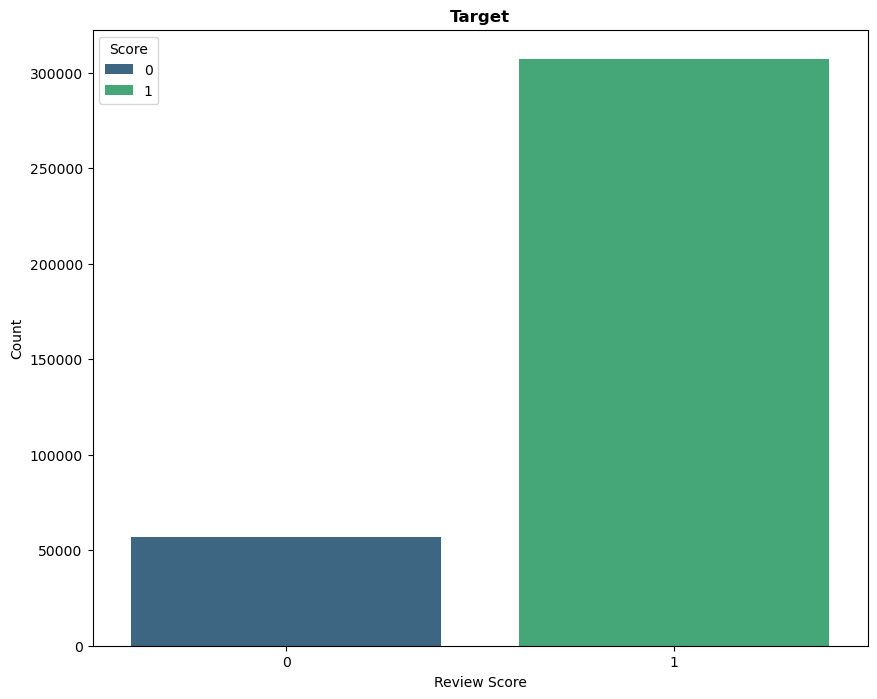

In [67]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Score', hue='Score', data=cleaned_df, palette="viridis")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.title("Target",fontweight="bold")

# Show the plot
plt.show()

### Interpretation:
The bar plot visualizes the distribution of review scores, where 0 represents negative reviews and 1 represents positive reviews, from the Amazon Fine Food Reviews dataset.

### Observations:
1. **Positive Reviews (Score 1)**:
The bar for score 1 is significantly taller, indicating a higher count of positive reviews. This suggests that the majority of reviews are positive, reflecting overall customer satisfaction with the food products.

2. **Negative Reviews (Score 0)**:
The bar for score 0 is shorter, indicating a lower count of negative reviews. This suggests that there are fewer negative reviews, which is a good sign for the products being reviewed.

### Insights:
The predominance of positive reviews highlights that customers generally have a favorable opinion of the food products. The relatively lower count of negative reviews indicates that most customers are satisfied, but there may still be areas for improvement to address the concerns of those who left negative feedback.

### Summary:
The bar plot effectively shows the distribution of review scores, revealing a strong positive sentiment among the majority of customers.

In [70]:
# saving the dataframe to csv file 
cleaned_df.to_csv("../Amazon Fine Food ML Project/Data/cleaned_data.csv", index=False)